In [1]:
import sys
sys.path += ["../"]

import smbh
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec

from mpl_toolkits.axes_grid1 import make_axes_locatable

COLOR_CYCLE = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Results

In [2]:
return_times = np.genfromtxt('../Week 13/return_times.txt')
return_masses = np.genfromtxt('../Week 13/return_masses.txt')
lyapunov = np.genfromtxt("../Week 13/lyapunov_exponents.txt")

# Global distributions

In [25]:
def gaussian(x, mu, std):
    v = std ** 2
    f = 1 / (2 * np.pi * v) ** 0.5
    exp = np.exp(- (x - mu) ** 2 / (2 * v))
    return f * exp

In [26]:
masses = return_masses.flatten()
m_max = 2
pos = (masses > 1) & (masses < m_max)

masses = masses[pos]

std = masses.std()
mu = masses.mean()

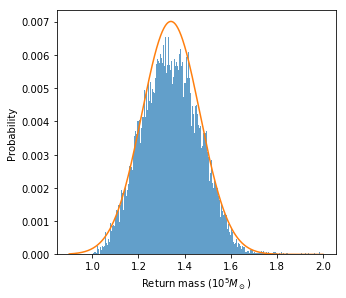

In [44]:
x = np.linspace(0.9, m_max, 500)
dx = x[1] - x[0]
y = gaussian(x, mu, std) * dx

fig, ax = plt.subplots(figsize = (5, 4.5))

freq, bins = np.histogram(masses, bins = 500, density = True)
db = np.diff(bins)
bins = 0.5 * (bins[1:] + bins[:-1])

ax.bar(bins, freq * db, width = bins[1] - bins[0], alpha = 0.7)
ax.plot(x, y, c = COLOR_CYCLE[1])

ax.set_xlabel('Return mass ($10 ^ 5M_\odot$)')
ax.set_ylabel('Probability')

# int_ = np.trapz(freq, dx = bins[1] - bins[0])
# print(int_)

fig.savefig('dist_masses.png', dpi = 300)

plt.show()

In [30]:
def function(x, mu1, std1, mu2, std2, a, b):
    return a * gaussian(x, mu1, std1) + gaussian(x, mu2, std2) * b

In [31]:
times = return_times.flatten()
pos = times != times.max()

times = np.log10(1000 * times[pos])

freq, bins = np.histogram(times, bins = 500, density = True)

bins = 0.5 * (bins[1:] + bins[:-1])

popt, pcov = curve_fit(function, bins, freq, bounds = (([-np.inf] * 4 + [0] * 2), ([np.inf] * 4 + [1] * 2)))
mu1, std1, mu2, std2, a, b = popt

In [32]:
print('mu1: %f\nstd1: %f\nmu2: %f\nstd2: %f\na: %f\nb: %f' % tuple(popt) )

mu1: 1.821182
std1: 0.236993
mu2: 2.593282
std2: 0.635910
a: 0.251845
b: 0.758393


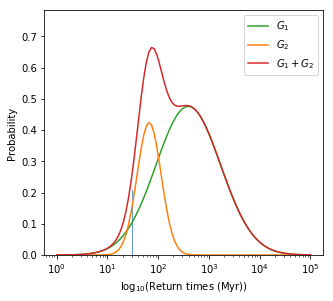

In [34]:
x = np.linspace(0, 5, 500)
y = function(x, *popt)

fig, ax = plt.subplots(figsize = (5, 4.5))

ax.bar(10 ** bins, freq, width = 0.01, alpha = 0.7)

y1 = a * gaussian(x, mu1, std1)
y2 = b * gaussian(x, mu2, std2)

x = 10 ** x

ax.plot(x, y2, c = COLOR_CYCLE[2], label= '$G_1$')
ax.plot(x, y1, c = COLOR_CYCLE[1], label = '$G_2$')
ax.plot(x, y, c = COLOR_CYCLE[3], label = '$G_1 + G_2$')

ax.set_xlabel(r'$\log_{10}$(Return times (Myr))')
ax.set_ylabel('Probability')

ax.legend()

ax.set_xscale("log")

# fig.savefig('dist_times.png', dpi = 300)

plt.show()